Mean Squared Error on Original Data: 4.173733526278068
Mean Squared Error on Drifted Data: 3.4250857041339877

Error Difference (Drifted - Original): -0.74864782214408


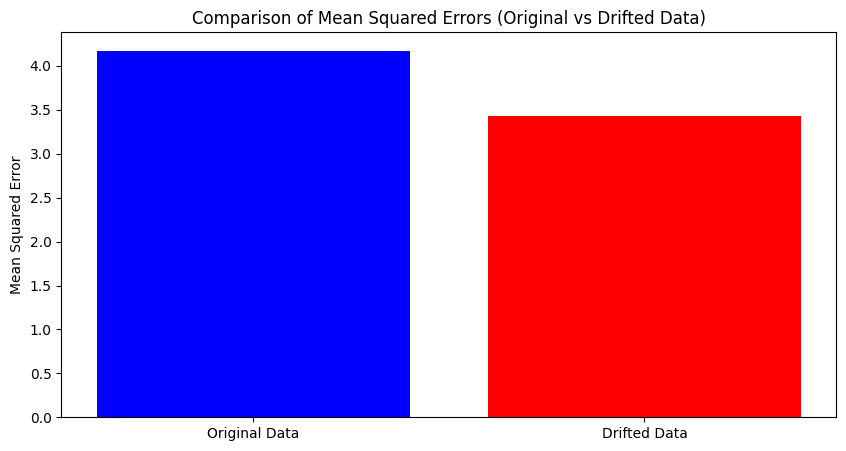

In [1]:
# Data Drift Impact on Model
# Question: Use a simple linear regression model to demonstrate how data drift affects model predictions.

# 1. Train a model on the original data:
# 2. Evaluate on the drifted data:
# 3. Compare errors:


import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. Generate a simple linear dataset (Original Data)
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Feature
y = 3 * X + 7 + np.random.randn(100, 1) * 2  # Target with some noise

# Split the original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 2. Train the Linear Regression model on the original data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on original test data
y_pred_original = model.predict(X_test)

# Calculate error on the original data
error_original = mean_squared_error(y_test, y_pred_original)
print(f"Mean Squared Error on Original Data: {error_original}")

# 3. Simulate Data Drift
# Simulate drift by adding a shift in the feature and changing the relationship with the target
X_drifted = X + np.random.randn(100, 1) * 2  # Adding noise to feature
y_drifted = 3 * X_drifted + 7 + np.random.randn(100, 1) * 2  # Adding noise to target

# Split the drifted data
X_train_drifted, X_test_drifted, y_train_drifted, y_test_drifted = train_test_split(X_drifted, y_drifted, test_size=0.2, random_state=0)

# Train the model again on the drifted data
model.fit(X_train_drifted, y_train_drifted)

# Predict on drifted test data
y_pred_drifted = model.predict(X_test_drifted)

# Calculate error on the drifted data
error_drifted = mean_squared_error(y_test_drifted, y_pred_drifted)
print(f"Mean Squared Error on Drifted Data: {error_drifted}")

# 4. Compare the errors (Original vs Drifted Data)
print(f"\nError Difference (Drifted - Original): {error_drifted - error_original}")

# Plot comparison of errors
plt.figure(figsize=(10, 5))
plt.bar(["Original Data", "Drifted Data"], [error_original, error_drifted], color=['blue', 'red'])
plt.title("Comparison of Mean Squared Errors (Original vs Drifted Data)")
plt.ylabel("Mean Squared Error")
plt.show()

Original Data Statistics:
{'X_mean': 4.727938395125177, 'X_std': 2.8830160501529014, 'y_mean': 21.568483873529775, 'y_std': 8.840140949974035}

Drifted Data Statistics:
{'X_mean': 4.425440483698158, 'X_std': 3.385582054967675, 'y_mean': 19.88264513738691, 'y_std': 11.346599258679229}

Detected Data Drift (if any):
{'y_std': {'original': 8.840140949974035, 'drifted': 11.346599258679229, 'percentage_change': 28.353148698523356}}


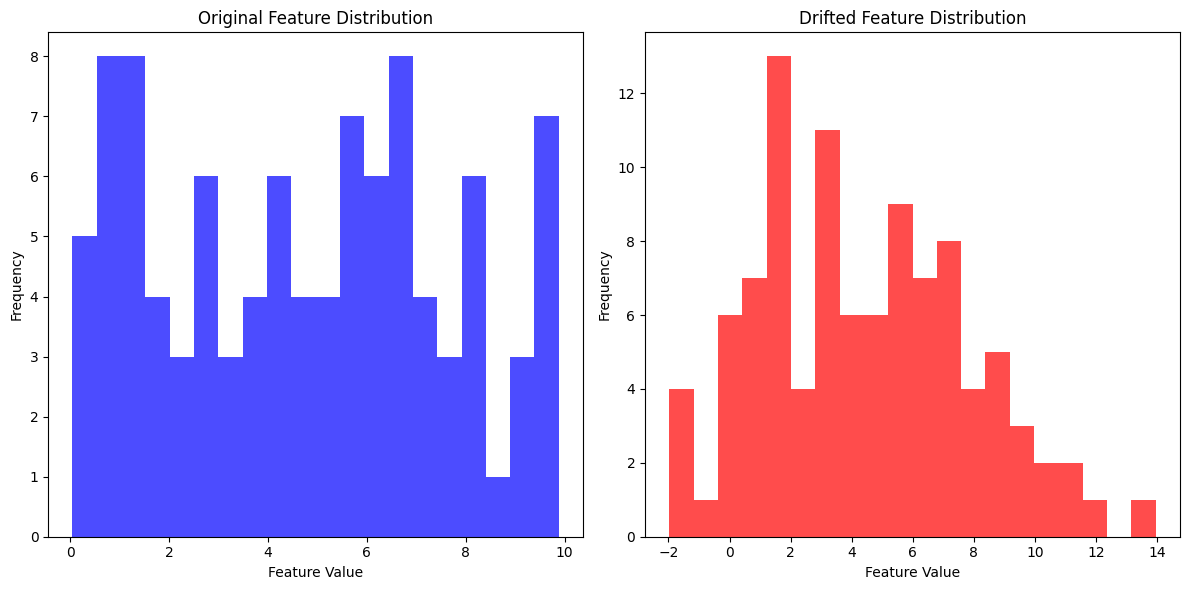

In [2]:
# Monitoring Data Distribution Changes
# Question: Use Python to monitor distribution changes in features to detect potential data drift.

# 1. Calculate feature statistics (mean and standard deviation) for both original and drifted data:
# 2. Compare statistics:
# 3. Set thresholds to detect significant drift:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Generate Original and Drifted Data
np.random.seed(0)

# Original data
X_original = np.random.rand(100, 1) * 10  # Feature with values between 0 and 10
y_original = 3 * X_original + 7 + np.random.randn(100, 1) * 2  # Target with some noise

# Simulate drift by adding noise to the feature and modifying the target's distribution
X_drifted = X_original + np.random.randn(100, 1) * 2  # Adding noise to feature
y_drifted = 3 * X_drifted + 7 + np.random.randn(100, 1) * 5  # Changing target's noise distribution

# 2. Calculate feature statistics (mean and standard deviation) for both original and drifted data
def calculate_statistics(X, y):
    """Calculate mean and standard deviation for features and target."""
    stats = {
        'X_mean': np.mean(X),
        'X_std': np.std(X),
        'y_mean': np.mean(y),
        'y_std': np.std(y)
    }
    return stats

# Calculate statistics for original data
original_stats = calculate_statistics(X_original, y_original)

# Calculate statistics for drifted data
drifted_stats = calculate_statistics(X_drifted, y_drifted)

print("Original Data Statistics:")
print(original_stats)
print("\nDrifted Data Statistics:")
print(drifted_stats)

# 3. Compare statistics and detect significant drift
def detect_data_drift(original_stats, drifted_stats, threshold=0.1):
    """Compare feature statistics and detect drift based on a threshold."""
    drift_detected = {}
    for key in original_stats:
        original_value = original_stats[key]
        drifted_value = drifted_stats[key]
        
        # Calculate percentage change
        percentage_change = abs(drifted_value - original_value) / original_value
        
        if percentage_change > threshold:
            drift_detected[key] = {
                'original': original_value,
                'drifted': drifted_value,
                'percentage_change': percentage_change * 100
            }
    
    return drift_detected

# Detect drift
drift = detect_data_drift(original_stats, drifted_stats, threshold=0.2)
print("\nDetected Data Drift (if any):")
print(drift)

# 4. Visualize the original and drifted feature distributions for better understanding
plt.figure(figsize=(12, 6))

# Plot the original data distribution
plt.subplot(1, 2, 1)
plt.hist(X_original, bins=20, color='blue', alpha=0.7, label='Original Feature')
plt.title('Original Feature Distribution')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')

# Plot the drifted data distribution
plt.subplot(1, 2, 2)
plt.hist(X_drifted, bins=20, color='red', alpha=0.7, label='Drifted Feature')
plt.title('Drifted Feature Distribution')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [3]:
# Automating Data Quality Checks with Python
# Question: Automate a basic data validation process using Python to ensure the dataset's
# structural integrity.

# 1. Define validation checks:
# 2. Apply validation:

import pandas as pd

# Sample DataFrame for illustration
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', None],
    'Age': [25, 30, 35, 40, 45],
    'Email': ['alice@example.com', 'bob@example.com', 'charlie@example.com', 'david@example.com', 'alice@example.com'],
    'Phone': ['123-456-7890', '987-654-3210', '555-555-5555', '123-456-7890', None]
}

df = pd.DataFrame(data)

# 1. Define validation checks
def check_missing_values(df):
    """Check for missing values in the dataset."""
    missing_values = df.isnull().sum()
    return missing_values

def check_duplicates(df):
    """Check for duplicate rows in the dataset."""
    duplicates = df.duplicated().sum()
    return duplicates

def check_column_existence(df, required_columns):
    """Check if all required columns are present in the dataset."""
    missing_columns = [col for col in required_columns if col not in df.columns]
    return missing_columns

def check_data_types(df, expected_types):
    """Check if the data types of columns match expected types."""
    incorrect_types = {col: type(df[col]).__name__ for col in df.columns if type(df[col]).__name__ != expected_types.get(col, None)}
    return incorrect_types

def validate_data(df, required_columns, expected_types):
    """Apply all the validation checks."""
    validation_results = {}

    # Check missing values
    validation_results['Missing Values'] = check_missing_values(df)
    
    # Check duplicates
    validation_results['Duplicate Rows'] = check_duplicates(df)
    
    # Check required columns
    validation_results['Missing Columns'] = check_column_existence(df, required_columns)
    
    # Check data types
    validation_results['Incorrect Data Types'] = check_data_types(df, expected_types)
    
    return validation_results

# 2. Apply validation
required_columns = ['Name', 'Age', 'Email', 'Phone']
expected_types = {
    'Name': 'str',
    'Age': 'int64',
    'Email': 'str',
    'Phone': 'str'
}

validation_results = validate_data(df, required_columns, expected_types)

# Print results
for check, result in validation_results.items():
    print(f"\n{check}:")
    if isinstance(result, pd.Series):
        print(result)
    else:
        print(result)



Missing Values:
Name     1
Age      0
Email    0
Phone    1
dtype: int64

Duplicate Rows:
0

Missing Columns:
[]

Incorrect Data Types:
{'Name': 'Series', 'Age': 'Series', 'Email': 'Series', 'Phone': 'Series'}


In [4]:
# Introducing Great Expectations for Data Validation
# Question: Use Great Expectations to set up data validation checks for a dataset.

# 1. Install Great Expectations:
# 2. Create a new expectations suite:
# 3. Load data and generate expectations:
import pandas as pd
import great_expectations as ge

# Step 1: Create a DataFrame manually
data = {
    'id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'age': [25, 30, 35, 40, 45]
}

df = pd.DataFrame(data)

# Step 2: Convert the pandas DataFrame to a Great Expectations DataFrame
ge_df = ge.from_pandas(df)

# Step 3: Create Expectations

# Check if "age" is greater than 0
ge_df.expect_column_values_to_be_between("age", min_value=0)

# Check if "name" does not contain null values
ge_df.expect_column_values_to_not_be_null("name")

# Ensure that "id" column contains only unique values
ge_df.expect_column_values_to_be_unique("id")

# Step 4: Validate the DataFrame
results = ge_df.validate()

# Step 5: Print the validation results
print(results)



AttributeError: module 'great_expectations' has no attribute 'from_pandas'

In [5]:
# Automating Constraint Checks with Python
# Question: Automate primary key and foreign key constraint checks using Python to ensure dataset compliance.


# 1. Assuming datasets exist with primary and foreign key relationships in pandas dataframes employees_df and departments_df :

import pandas as pd

# Sample data for employees_df (Primary Key: employee_id, Foreign Key: department_id)
employees_data = {
    'employee_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David'],
    'department_id': [101, 102, 103, 101]
}

# Sample data for departments_df (Primary Key: department_id)
departments_data = {
    'department_id': [101, 102, 103],
    'department_name': ['HR', 'Engineering', 'Sales']
}

# Create DataFrames
employees_df = pd.DataFrame(employees_data)
departments_df = pd.DataFrame(departments_data)

# -------------------
# 1. Primary Key Constraint Check
# Check if 'employee_id' is unique (no duplicates)
def check_primary_key(df, column_name):
    if df[column_name].is_unique:
        print(f"Primary key constraint passed for {column_name}")
    else:
        print(f"Primary key constraint failed for {column_name}")

# Check for uniqueness in 'employee_id' (Primary Key in employees_df)
check_primary_key(employees_df, 'employee_id')

# -------------------
# 2. Foreign Key Constraint Check
# Check if all 'department_id' in employees_df exist in departments_df
def check_foreign_key(df, foreign_key_column, reference_df, reference_column):
    invalid_references = df[~df[foreign_key_column].isin(reference_df[reference_column])]
    if invalid_references.empty:
        print(f"Foreign key constraint passed for {foreign_key_column}")
    else:
        print(f"Foreign key constraint failed for {foreign_key_column}. Invalid references found:")
        print(invalid_references)

# Check if 'department_id' in employees_df is valid in departments_df
check_foreign_key(employees_df, 'department_id', departments_df, 'department_id')


Primary key constraint passed for employee_id
Foreign key constraint passed for department_id


KS Statistic: 0.229
P-Value: 2.1603957516211753e-23
Data drift detected: The distributions are significantly different.


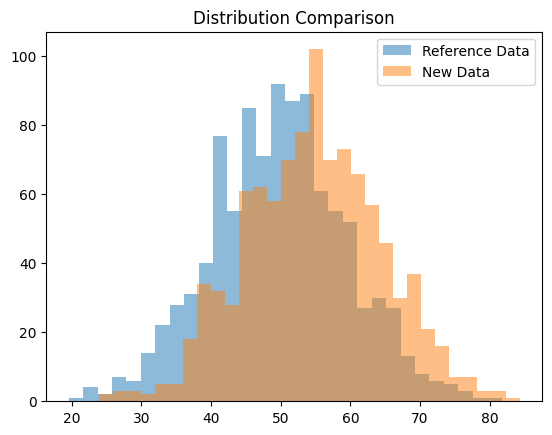

In [6]:
# Advanced Data Drift Detection using Statistical Tests
# Question: Implement Kolmogorov-Smirnov test using Python to detect data drift at a more sophisticated level.

# 1. Use SciPy to perform KS test:


import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Sample data: Reference dataset and new dataset
reference_data = np.random.normal(loc=50, scale=10, size=1000)  # Reference distribution (normal with mean 50, std 10)
new_data = np.random.normal(loc=55, scale=10, size=1000)  # New distribution (mean shifted to 55)

# Perform Kolmogorov-Smirnov test
ks_statistic, p_value = stats.ks_2samp(reference_data, new_data)

# Print the results
print(f"KS Statistic: {ks_statistic}")
print(f"P-Value: {p_value}")

# Interpretation of results
if p_value < 0.05:
    print("Data drift detected: The distributions are significantly different.")
else:
    print("No data drift detected: The distributions are not significantly different.")

# Visualizing the distributions for comparison
plt.hist(reference_data, bins=30, alpha=0.5, label="Reference Data")
plt.hist(new_data, bins=30, alpha=0.5, label="New Data")
plt.legend()
plt.title("Distribution Comparison")
plt.show()